## Вариант 5

# Задание 1

Возьмем стандартный датасет из `seaborn` - `taxis`. Необходимо выполнить одну визуализацию на `pandas` и одну на `R`. Для визуализации на `R` данные возьмите отсюда: https://github.com/mwaskom/seaborn-data/blob/master/taxis.csv.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from random import choice
var = pd.DataFrame([[choice(range(1,16)), choice(range(1,16))] for _ in range(35)], columns=["pandas", "R"]).T
var.drop(columns=[0], axis=1, inplace=True)
display(var.iloc[:,0:17])
display(var.iloc[:,17:])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
pandas,8,13,9,3,5,3,11,14,5,11,14,6,10,13,13,9,8
R,9,10,14,6,1,12,13,2,3,3,11,5,7,11,3,12,3


,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
pandas,11,13,2,4,15,3,8,15,8,2,8,13,2,1,11,14,3
R,7,1,7,11,10,1,11,2,1,6,5,12,11,10,7,4,12


In [ ]:
df = sns.load_dataset("taxis")
display(df.head(2))
df.shape

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


(6433, 14)

Датасет содержит данные о поездках на такси в Нью-Йорке за 2019 год. Столбцы следующие (возможны опечатки, будьте внимательны):
* `pickup` – время начала поездки
* `dropoff` – время окончания поездки
* `passengers` – количество пассажиров
* `distance` – расстояние поездки
* `fare` – стоимость поездки
* `tip` – чаевые
* `tolls` – штраф
* `total` – общая стоимость поездки
* `color` – цвет такси
* `payment` – способ оплаты
* `pickup_zone` – район начала поездки
* `dropoff_zone` – район окончания поездки
* `pickup_borough` – боро начала поездки
* `dropoff_borough` – боро окончания поездки

Подробнее про данные: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

2. Когда поездок совершается больше: в начале месяца, в конце или в середине? Ответ справедлив для всех месяцев или каждый месяц по-разному? Начало месяца - [1;10), середилна месяца - [10;20), конец месяца - с 20 числа до конца месяца.

In [ ]:
#распределение по дням
df['pickup'] = pd.to_datetime(df['pickup'])
taxis = df.assign(day = df.pickup.dt.day).reset_index(drop=True)
trip = taxis.iloc[:,[0,14]]
trip = trip.groupby(by=['day'])['pickup'].count().reset_index()
start_sum = 0
middle_sum = 0
end_sum = 0
for i in range(0,30):
  if i < 9:
    start_sum += trip.pickup[i]
  elif 9 <= i < 19:
    middle_sum += trip.pickup[i]
  else:
    end_sum += trip.pickup[i]
use_date = pd.DataFrame({'period':['start_of_month', 'middle_of_month','end_of_month'],  'num':[start_sum,middle_sum,end_sum]})
use_date

,period,num
0,start_of_month,1921
1,middle_of_month,2089
2,end_of_month,2236


Text(0, 0.5, 'count')

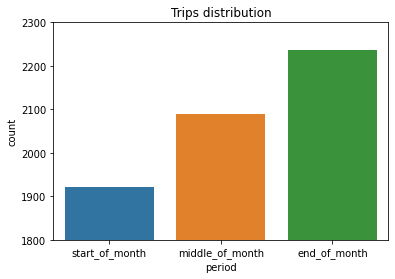

In [ ]:
#визуализация
sns.barplot(x = use_date.period, y = use_date.num)
plt.ylim(1800, 2300)
plt.title('Trips distribution')
plt.ylabel("count")

# Вывод

В файле большинство поездок совершается в конце месяца(в каждом месяце)

# Задание 2



Воспользуемся стандартным датасетом `titanic`. Загрузим его из модуля `seaborn`. Необходимо выполнить одну визуализацию на `pandas` и одну на `R`. Для визуализации на `R` данные возьмите отсюда: https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

In [ ]:
var = pd.DataFrame([[choice(range(1,9)), choice(range(1,9))] for _ in range(35)], columns=["pandas", "R"]).T
var.drop(columns=[0], axis=1, inplace=True)
display(var.iloc[:,0:17])
display(var.iloc[:,17:])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
pandas,2,2,7,3,3,7,6,2,7,5,1,7,7,1,7,1,8
R,6,3,5,1,6,5,1,7,8,3,6,1,7,8,3,4,5


,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
pandas,1,2,6,5,5,4,2,2,4,4,4,5,2,6,1,5,3
R,5,4,7,5,6,7,7,6,8,6,5,4,4,4,4,1,1


In [ ]:
data = sns.load_dataset("titanic")
display(data.head())
data.shape

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(891, 15)

6. Поcтройте корреляционную матрицу для столбцов **pclass**, **age**, **sex**, **fare**, **deck**.

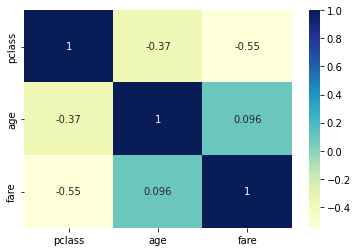

In [ ]:
titanic = data.iloc[:, [1,2,3,6,11]].corr()
sns.heatmap(data=titanic, annot=True, cmap="YlGnBu")